## Solution Sketch Lab 10

## 1. Oil Drilling

Consider the prediction of drilling. Say that there are 50 licenceses active in 2019 (year=15.5) and that the oil price is 1.5 standard deviations above its mean. 

Simulate the number of drilling events that will happen on those 50 licences and show the distribution of the number of drilling events. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns




In [9]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




In [10]:
drilling = pd.read_csv("data/drilling.csv")
drilling = drilling.loc[drilling.year!=2020].copy()
drilling["drilled"] = np.where(drilling.nDrills>0, 1, 0)
drillingOil = drilling.loc[drilling.brent_l1.notna()].copy()
drillingOil["year_c"] = drillingOil.year - drillingOil.year.unique().mean()
drillingOil["brent_s"] = (drillingOil.brent - drillingOil.brent.unique().mean())/drillingOil.brent.unique().std()
drillingOil["brent_l1_s"] = (drillingOil.brent_l1 - drillingOil.brent_l1.unique().mean())/drillingOil.brent_l1.unique().std()



In [12]:
drill_mod3 = smf.glm(formula="drilled~year_c + brent_s + brent_l1_s", data=drillingOil, family=sm.families.Binomial()).fit()

In [15]:
drill_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                drilled   No. Observations:                11476
Model:                            GLM   Df Residuals:                    11472
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.4
Date:                Mon, 31 Oct 2022   Deviance:                       5366.8
Time:                        09:53:38   Pearson chi2:                 1.16e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01192
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5137      0.039    -63.746      0.000      -2.591      -2.436
year_c        -0.0587      0.007     -8.705      0.000      -0.072      -0.045
brent_s       -0.1206      0.078     -1.553      0.120      -0.273       0.032
brent_l1_s     0.2204      0.078      2.815      0.005       0.067       0.374
==============================================================================
"""

In [19]:
#our inverse logit function
def invLogit(x):
    return(np.exp(x)/(1+np.exp(x)))

#our function for inferential uncertainty

def logSim(regMod): 
    #extract values from regression model
    nmk = regMod.df_resid #n-k
    bs_vcov = regMod.cov_params() #we extract the scaled vcov matrix
    V_sim =np.array(bs_vcov)*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    bs = regMod.params
    
    #create simulated values
    bs_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return(bs_sim.flatten())


In [17]:
y_new = 15.5
oil_new = 1.5
oil_l_new = 1.5

nsim = 4000
nlic = 50

bs_sims = []

# The difference between this exercise and the previous is that we now are simulating the mean of 50 licences 
# instead of just one


y50_sim = np.empty([nsim,nlic])

In [18]:
#can take a minute

for l in range(nlic):
    for s in range(nsim):
        param_sim = logSim(drill_mod3)
        bs_sims.append(param_sim)
        p_new = invLogit(param_sim[0] + param_sim[1]*y_new + param_sim[2]*oil_new + param_sim[3]*oil_l_new)
        y50_sim[s,l]=spt.binom.rvs(1, p_new, 1) #a binomial with 1 draw - also called a bernoulli random
     





In [9]:
y50_sim = y50_sim-1 #convert from 1-2 to 0-1
y50_sim = pd.DataFrame(y50_sim)


In [10]:
total_drills = y50_sim.sum(axis=1) #sum of row

<AxesSubplot:>

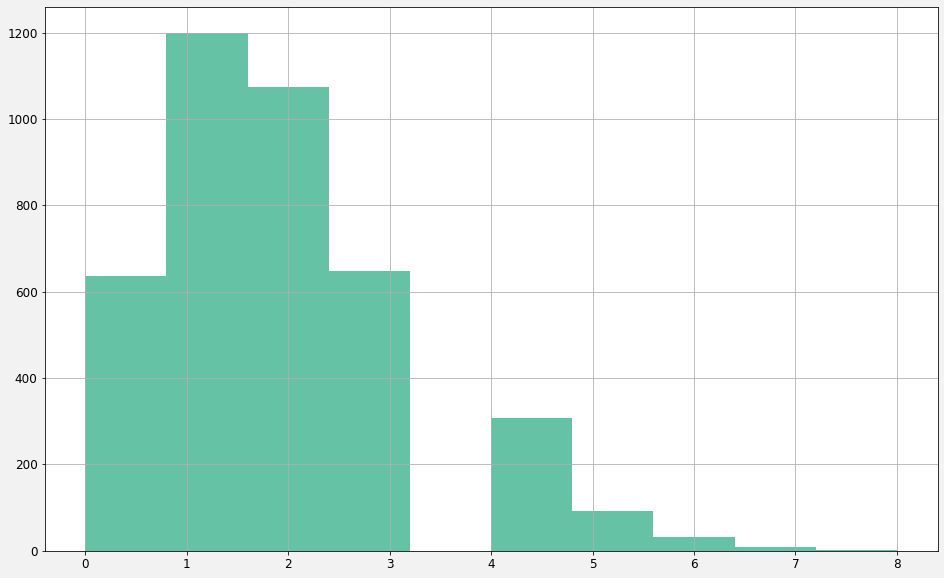

In [11]:
total_drills.hist()

In [58]:
y_new = 15.5
oil_new = 2
oil_l_new = 2

nsim = 4000
nlic = 50

bs_sims = []

# The difference between this exercise and the previous is that we now are simulating the mean of 50 licences 
# instead of just one


y50_sim2 = np.empty([nsim,nlic])

for l in range(nlic):
    for s in range(nsim):
        param_sim = logSim(drill_mod3)
        bs_sims.append(param_sim)
        p_new = invLogit(param_sim[0] + param_sim[1]*y_new + param_sim[2]*oil_new + param_sim[3]*oil_l_new)
        y50_sim2[s,l]=spt.binom.rvs(1, p_new, 1) #a binomial with 1 draw - also called a bernoulli random
     






In [55]:
y50_sim2 -1

y50_sim2 = pd.DataFrame(y50_sim2)
total_drills2 = y50_sim2.sum(axis=1) #sum of row


y50_diff = total_drills2 - total_drills


<AxesSubplot:>

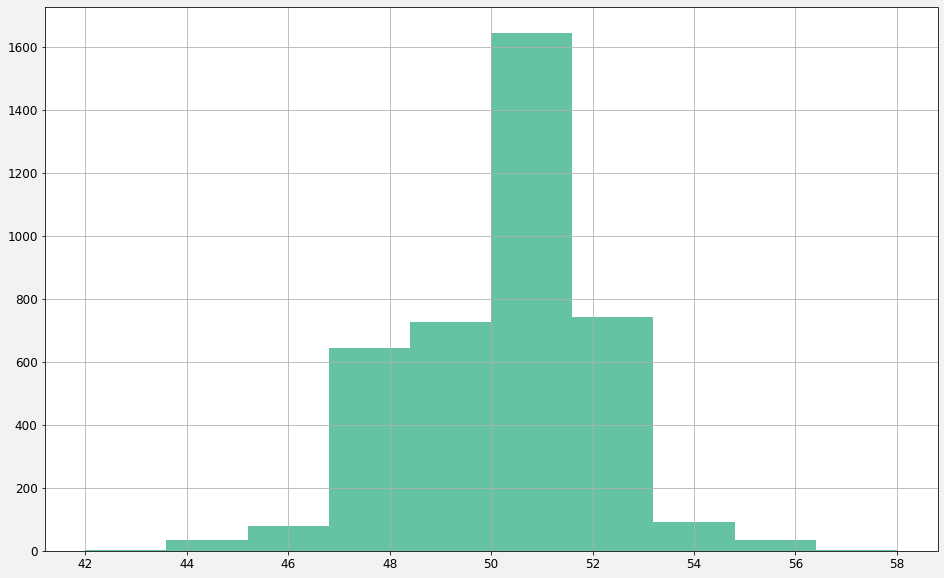

In [56]:
y50_diff.hist()

In [57]:
y50_sim2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
